In [1]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import imageio
import argparse
import cv2
import os
import json

In [2]:
model = load_model("facemaskmodel_bestcopy.h5")
PATH_TEST = "C:/Users/User/Desktop/avizigi"

In [11]:
# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = "C:/Users/User/Desktop/CaffemodelSSD/deploy.prototxt"
weightsPath = "C:/Users/User/Desktop/CaffemodelSSD/res10_300x300_ssd_iter_140000.caffemodel"

print(prototxtPath)
print(weightsPath)

net = cv2.dnn.readNet(prototxtPath, weightsPath)
# load the face mask detector model from disk
# print("[INFO] loading face mask detector model...")
# model = load_model(r"./mask_detector.model")

[INFO] loading face detector model...
C:/Users/User/Desktop/CaffemodelSSD/deploy.prototxt
C:/Users/User/Desktop/CaffemodelSSD/res10_300x300_ssd_iter_140000.caffemodel


In [12]:
def plot_image(imagepath):
    # print(imagepath)
    image = cv2.imread(imagepath)

    orig = image.copy()
    (h, w) = image.shape[:2]
    # construct a blob from the image
    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
        (104.0, 177.0, 123.0))
    # pass the blob through the network and obtain the face detections
    # print("[INFO] computing face detections...")
    net.setInput(blob)
    detections = net.forward()
    
    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with
        # the detection
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the confidence is
        # greater than the minimum confidence
        if confidence > 0.5:
            # compute the (x, y)-coordinates of the bounding box for
            # the object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            # ensure the bounding boxes fall within the dimensions of
            # the frame
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
            # extract the face ROI, convert it from BGR to RGB channel
            # ordering, resize it to 224x224, and preprocess it
            face = image[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)
            face = np.expand_dims(face, axis=0)
            # pass the face through the model to determine if the face
            # has a mask or not
            (mask, withoutMask) = model.predict(face)[0]
            # determine the class label and color we'll use to draw
            # the bounding box and text
            label = "Mask" if mask > withoutMask else "No Mask"
            color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
            # include the probability in the label
            # print("{} {:.2f}%".format("", max(mask, withoutMask) * 100))
            label = "{}:{:.2f}%".format(label, max(mask, withoutMask) * 100)
            # print(label)
            # display the label and bounding box rectangle on the output
            # frame
            cv2.putText(image, label, (startX, startY - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 3, color, 10)
            cv2.rectangle(image, (startX, startY), (endX, endY), color, 20)

            # show the output image
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGBA)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(image)

In [15]:
# Creating data for test images

import numpy as np 
import pandas as pd 
TestImagePath = []

import os
for dirname, _, filenames in os.walk("C:/Users/User/Desktop/avizigi"):
    for filename in filenames:
        TestImagePath.append(os.path.join(dirname, filename))
#         print(os.path.join(dirname, filename))


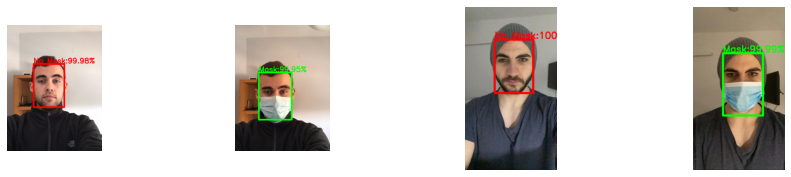

In [16]:
# verification of several images
import matplotlib.pyplot as plt
num_rows=1
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,3*num_rows))
i=1
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(TestImagePath[i])
    
plt.show()